In [11]:
import numpy as np
import os

In [12]:
path = "C:/Users/Tiam Tee/Documents/Practitioner's challenge/showcase/plots_peak/3_{}/"

Load data

In [13]:
def load_npy(folder):
    return [file for file in os.listdir(folder) if file.endswith(".npy")]

In [15]:
data_dict = {}
array_dict = {}
for i in [4,5,7,8]:
    npath = path.format(i)
    filelist = load_npy(npath)
    for file in filelist:
        xfile = np.load(os.path.join(npath,file))
        array_dict[str(file)] = xfile
    data_dict["data3_" + str(i)] = array_dict

AMPD

In [19]:
def AMPD(data):
    """
    :param data: 1-D numpy.ndarray (time series)
    :return: the x axis position of the peaks in the series
    """
    p_data = np.zeros_like(data, dtype=np.int32)
    count = data.shape[0]
    arr_rowsum = []
    for k in range(1, count // 2 + 1):
        row_sum = 0
        for i in range(k, count - k):
            if data[i] > data[i - k] and data[i] > data[i + k]:
                row_sum -= 1
        arr_rowsum.append(row_sum)
    min_index = np.argmin(arr_rowsum)
    max_window_length = min_index
    for k in range(1, max_window_length + 1):
        for i in range(k, count - k):
            if data[i] > data[i - k] and data[i] > data[i + k]:
                p_data[i] += 1
    # result_1 = np.where(p_data == max_window_length)[0]
    # arr_rowsum = np.delete(arr_rowsum,min_index)
    # min_index = np.argmin(arr_rowsum)
    # max_window_length = min_index
    # for k in range(1, max_window_length + 1):
    #     for i in range(k, count - k):
    #         if data[i] > data[i - k] and data[i] > data[i + k]:
    #             p_data[i] += 1
    #
    # result_2 = np.where(p_data == max_window_length)[0]
    # return np.concatenate((result_1, result_2))
    return np.where(p_data == max_window_length)[0]

In [20]:
AMPD(data_dict['data3_4']['5dc3f8b18d8f0d06c631b3f2_L.npy'])

array([ 84, 135, 186, 248, 303, 366, 436, 499, 576], dtype=int64)

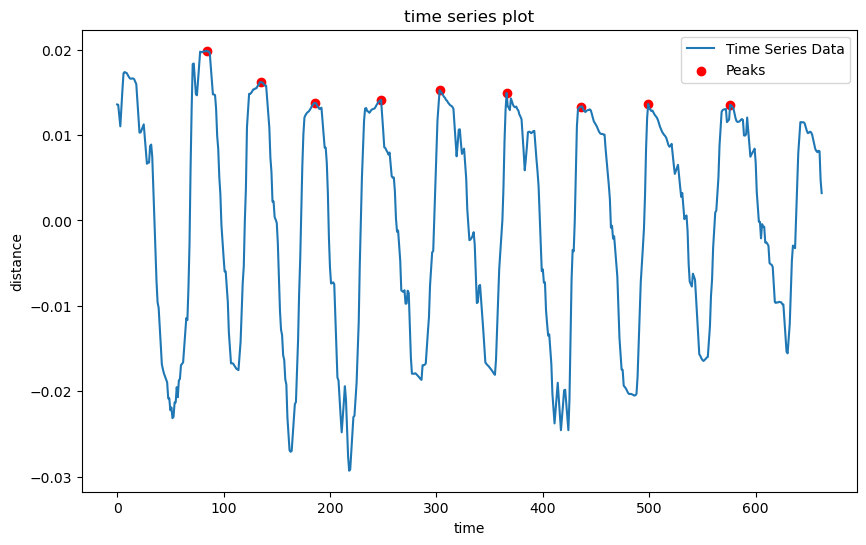

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_dict['data3_4']['5dc3f8b18d8f0d06c631b3f2_L.npy'], label='Time Series Data')
plt.scatter(AMPD(data_dict['data3_4']['5dc3f8b18d8f0d06c631b3f2_L.npy']), data_dict['data3_4']['5dc3f8b18d8f0d06c631b3f2_L.npy'][AMPD(data_dict['data3_4']['5dc3f8b18d8f0d06c631b3f2_L.npy'])], c='red', label='Peaks', marker='o')

plt.xlabel('time')
plt.ylabel('distance')
plt.title('time series plot')
plt.legend()

plt.show()

from 0 - 50, there is a peak that the algorithm didnt capture. also, at roughly 375 position and also after 600. 

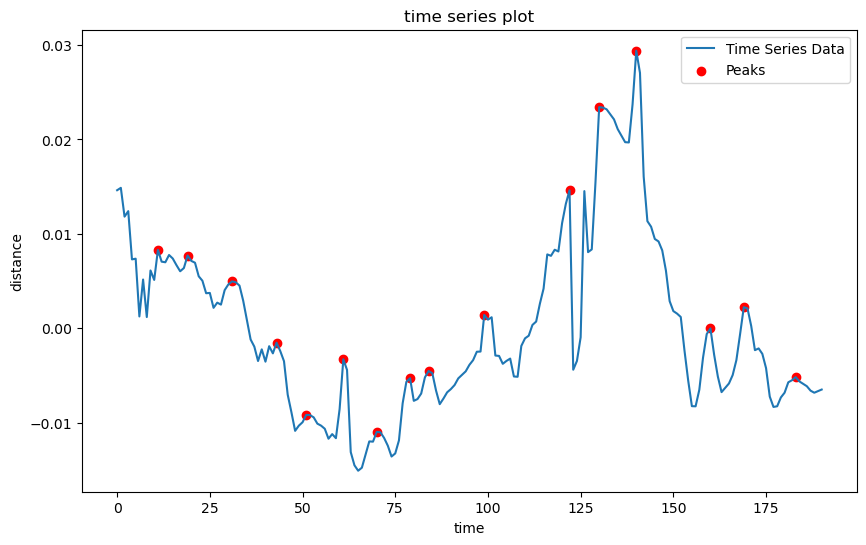

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data_dict['data3_4']['5f6b2efa8d8f0d4f20da55eb_L.npy'], label='Time Series Data')
plt.scatter(AMPD(data_dict['data3_4']['5f6b2efa8d8f0d4f20da55eb_L.npy']), data_dict['data3_4']['5f6b2efa8d8f0d4f20da55eb_L.npy'][AMPD(data_dict['data3_4']['5f6b2efa8d8f0d4f20da55eb_L.npy'])], c='red', label='Peaks', marker='o')

plt.xlabel('time')
plt.ylabel('distance')
plt.title('time series plot')
plt.legend()

plt.show()

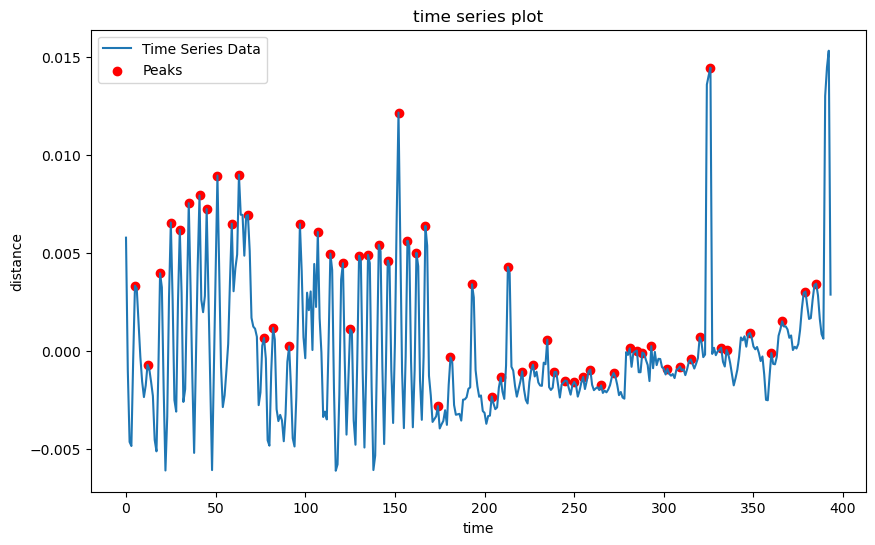

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data_dict['data3_4']['5fd33b4705e806000a16ffda_L.npy'], label='Time Series Data')
plt.scatter(AMPD(data_dict['data3_4']['5fd33b4705e806000a16ffda_L.npy']), data_dict['data3_4']['5fd33b4705e806000a16ffda_L.npy'][AMPD(data_dict['data3_4']['5fd33b4705e806000a16ffda_L.npy'])], c='red', label='Peaks', marker='o')

plt.xlabel('time')
plt.ylabel('distance')
plt.title('time series plot')
plt.legend()

plt.show()